In [1]:
import seaborn as sns
import pandas as pd

In [2]:
sns.__version__

'0.12.0.dev0'

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.set_style("ticks")

In [4]:
data_file = 'data/subjective.csv'
responses = pd.read_csv(data_file)
responses

,-2,-1,0,1,2,Total
0,0,3,2,23,4,32
1,0,1,9,17,3,30
2,0,5,5,9,4,23
3,0,3,8,11,5,27
4,0,1,12,12,5,30
...,...,...,...,...,...,...
95,0,4,6,9,2,21
96,1,7,4,8,3,23
97,2,5,8,10,3,28
98,0,1,2,14,6,23


In [5]:
columns = ['-2', '-1', '0', '1', '2']

In [6]:
probabilities = responses[columns].divide(responses['Total'], axis='index')
probabilities

,-2,-1,0,1,2
0,0.000000,0.093750,0.062500,0.718750,0.125000
1,0.000000,0.033333,0.300000,0.566667,0.100000
2,0.000000,0.217391,0.217391,0.391304,0.173913
3,0.000000,0.111111,0.296296,0.407407,0.185185
4,0.000000,0.033333,0.400000,0.400000,0.166667
...,...,...,...,...,...
95,0.000000,0.190476,0.285714,0.428571,0.095238
96,0.043478,0.304348,0.173913,0.347826,0.130435
97,0.071429,0.178571,0.285714,0.357143,0.107143
98,0.000000,0.043478,0.086957,0.608696,0.260870


In [7]:
#responses_scaled = responses / responses.sum().sum()
#responses_scaled = responses / responses['Total'].max()
responses_scaled = responses / responses['Total'].mean()
responses_scaled

,-2,-1,0,1,2,Total
0,0.000000,0.109091,0.072727,0.836364,0.145455,1.163636
1,0.000000,0.036364,0.327273,0.618182,0.109091,1.090909
2,0.000000,0.181818,0.181818,0.327273,0.145455,0.836364
3,0.000000,0.109091,0.290909,0.400000,0.181818,0.981818
4,0.000000,0.036364,0.436364,0.436364,0.181818,1.090909
...,...,...,...,...,...,...
95,0.000000,0.145455,0.218182,0.327273,0.072727,0.763636
96,0.036364,0.254545,0.145455,0.290909,0.109091,0.836364
97,0.072727,0.181818,0.290909,0.363636,0.109091,1.018182
98,0.000000,0.036364,0.072727,0.509091,0.218182,0.836364


In [8]:
responses_scaled.sum()

-2         1.672727
-1         9.163636
0         26.363636
1         47.745455
2         15.054545
Total    100.000000
dtype: float64

In [9]:
probabilities.sum()

-2     1.672977
-1     9.332715
0     26.183454
1     47.721558
2     15.089296
dtype: float64

In [10]:
responses_stacked = pd.melt(responses, value_vars=columns, var_name='response', value_name='response_count')

In [11]:
responses_scaled_stacked = pd.melt(responses_scaled, value_vars=columns, var_name='response', value_name='response_count')

In [12]:
probabilities_stacked = pd.melt(probabilities, value_vars=columns, var_name='response', value_name='response_probability')

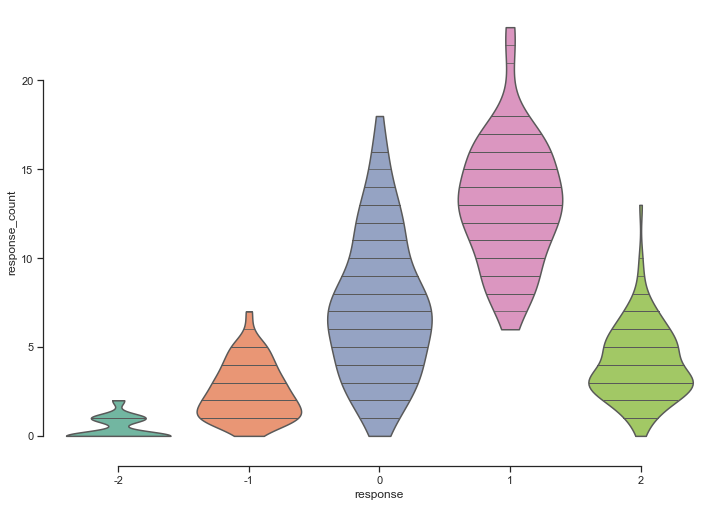

In [13]:
sns.violinplot(data=responses_stacked, x='response', y='response_count', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

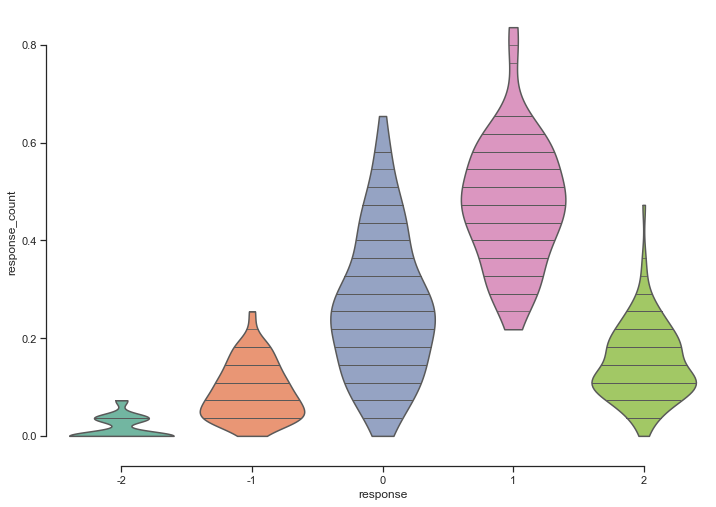

In [14]:
sns.violinplot(data=responses_scaled_stacked, x='response', y='response_count', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

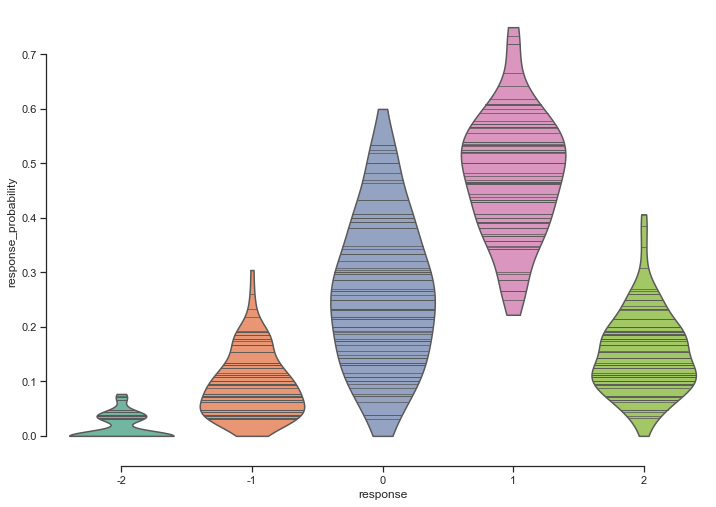

In [15]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

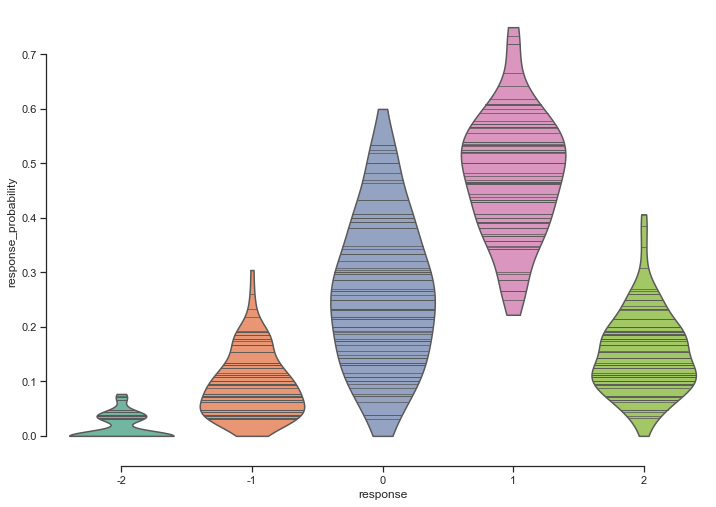

In [16]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='width', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

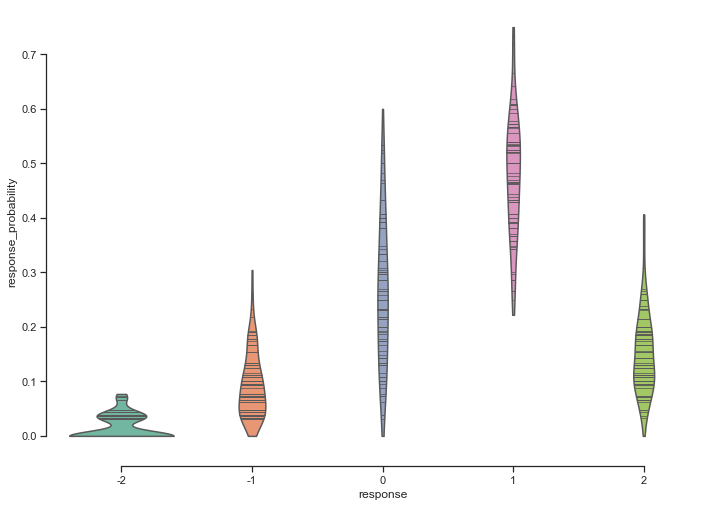

In [17]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='area', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

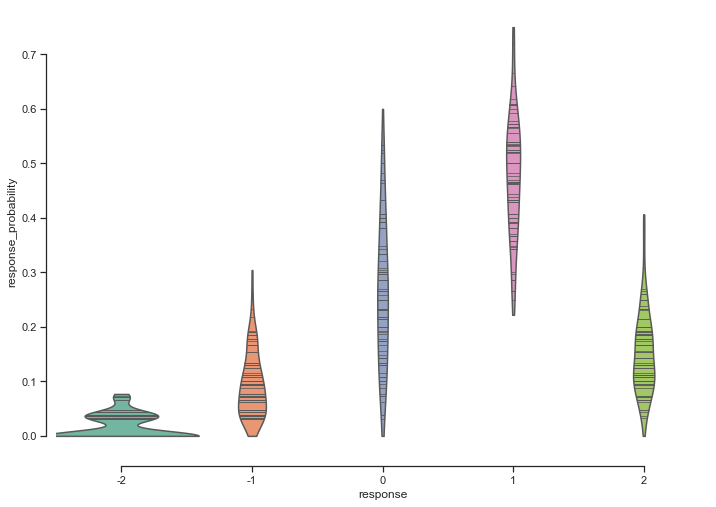

In [18]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='area_v2', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

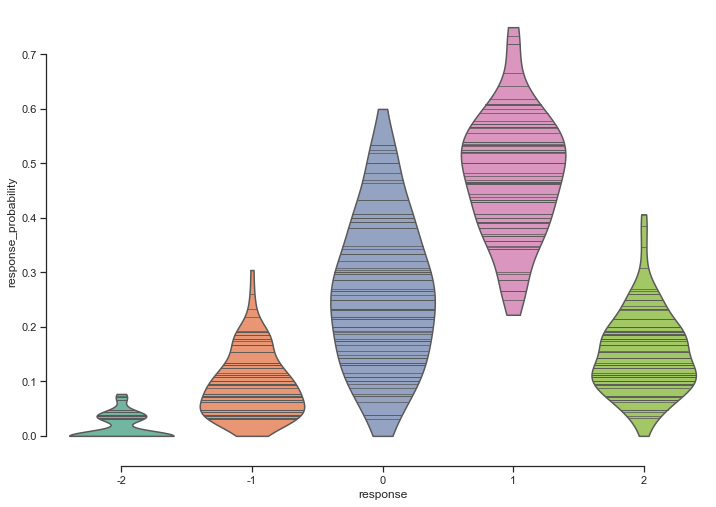

In [19]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='count_area', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

final_proportions: [0.01672977 0.09332715 0.26183454 0.47721558 0.15089296]


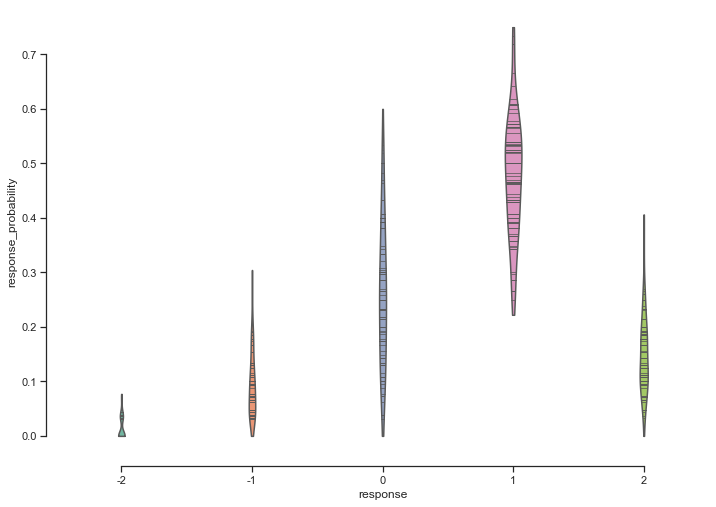

In [20]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='relative_area', inner='stick', cut=0, width=2)
sns.despine(offset=10, trim=True);

final_proportions: [0.01672977 0.09332715 0.26183454 0.47721558 0.15089296]


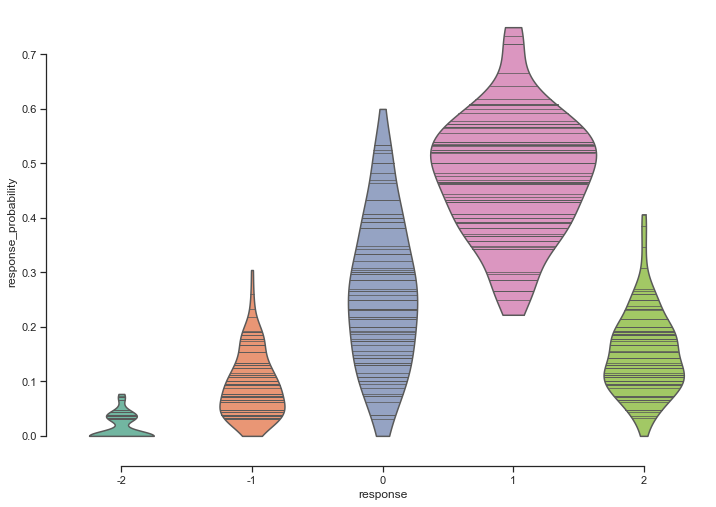

In [21]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='relative_area', inner='stick', cut=0, width=20)
sns.despine(offset=10, trim=True);

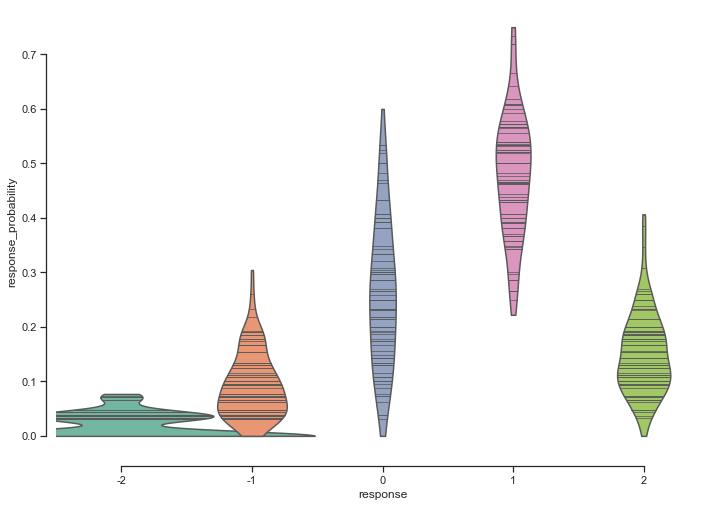

In [22]:
sns.violinplot(data=probabilities_stacked, x='response', y='response_probability', palette='Set2', scale='area_v2', inner='stick', width=2, cut=0)
sns.despine(offset=10, trim=True);

In [24]:
joined_data = responses_scaled_stacked.join(probabilities_stacked[['response_probability']])
joined_data

,response,response_count,response_probability
0,-2,0.000000,0.000000
1,-2,0.000000,0.000000
2,-2,0.000000,0.000000
3,-2,0.000000,0.000000
4,-2,0.000000,0.000000
...,...,...,...
495,2,0.072727,0.095238
496,2,0.109091,0.130435
497,2,0.109091,0.107143
498,2,0.218182,0.260870


In [25]:
stacked_joined_data = pd.melt(joined_data, id_vars=['response'], value_vars=['response_count', 'response_probability'], var_name='type', value_name='score')
stacked_joined_data

,response,type,score
0,-2,response_count,0.000000
1,-2,response_count,0.000000
2,-2,response_count,0.000000
3,-2,response_count,0.000000
4,-2,response_count,0.000000
...,...,...,...
995,2,response_probability,0.095238
996,2,response_probability,0.130435
997,2,response_probability,0.107143
998,2,response_probability,0.260870


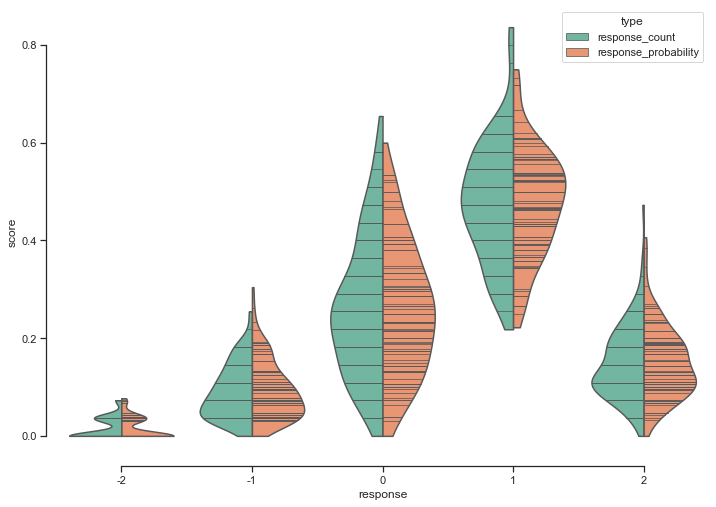

In [26]:
sns.violinplot(data=stacked_joined_data, x='response', y='score', split=True, hue='type', palette='Set2', scale='count', inner='stick', cut=0)
sns.despine(offset=10, trim=True);

final_proportions: [[0.00167273 0.00167298]
 [0.00916364 0.00933272]
 [0.02636364 0.02618345]
 [0.04774545 0.04772156]
 [0.01505455 0.0150893 ]]


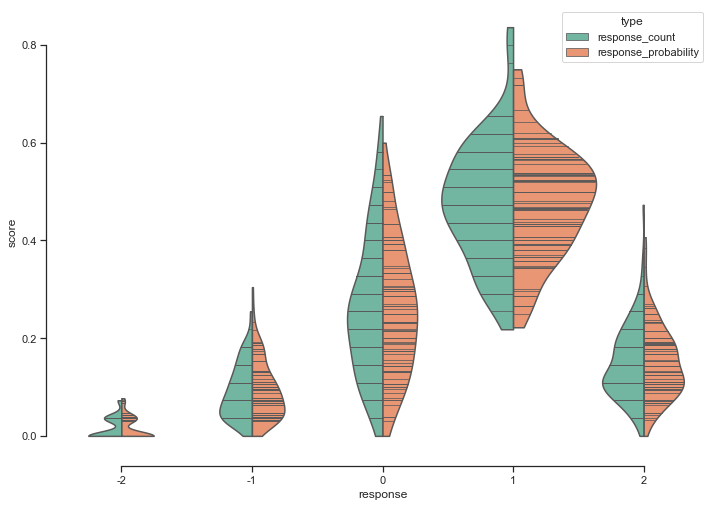

In [32]:
sns.violinplot(data=stacked_joined_data, x='response', y='score', split=True, hue='type', palette='Set2', scale='relative_area', inner='stick', cut=0, width=20, scale_hue=False)
sns.despine(offset=10, trim=True);

In [28]:
responses_scaled.sum()/responses_scaled[columns].sum().sum(), probabilities.sum()/probabilities.sum().sum()

(-2       0.016727
 -1       0.091636
 0        0.263636
 1        0.477455
 2        0.150545
 Total    1.000000
 dtype: float64,
 -2    0.016730
 -1    0.093327
 0     0.261835
 1     0.477216
 2     0.150893
 dtype: float64)